In [2]:
import math
from utilities.distPlot import plot
import numpy as np
from random import random 

## Ej 2

a)Indique como se obtiene mediante simulación el valor de la integral  
b)Genere al menos 100 valores y detengase cuando la desviacion muestral S del estimador sea menor que 0.01
$$
\begin{equation*}
i) 
\int_{0}^{1} \cfrac{e^x}{\sqrt{2x}}dx\\
ii)\int_{-\infty}^{\infty}x^{2}exp(-x^{2})dx
\end{equation*}
$$


### ii

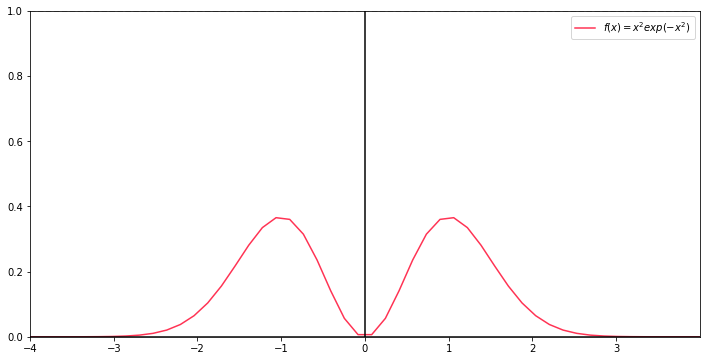

In [29]:
x = np.linspace(-4,4)
f = [lambda x: (x**2)*np.exp(-x**2)]
labels = [r'$f(x)=x^{2}exp(-x^{2})$']

plot(f,x_lim=(-4,4),y_lim=(0,1),labels=labels,dist=False,ls='-')

Al ser una función par, se tiene que:
$$
\begin{equation*}
\begin{split}
\int_{-\infty}^{\infty}x^{2}exp(-x^{2})dx = 2 \int_{0}^{\infty}x^{2}exp(-x^{2})dx
\end{split}
\end{equation*}
$$
Realizamos el cambio de variables $y = \cfrac{1}{x+1}$, $dy = -\cfrac{1}{(x+1)^{2}}dx= -y^{2}dx$.


$$
\begin{equation*}
\begin{split}
2 \int_{0}^{\infty}x^{2}exp(-x^{2})dx &= 
-2 \int_{1}^{0}(\frac{1}{y}-1)^{2}exp(-(\frac{1}{y}-1)^{2})\cfrac{dy}{y^{2}} \\
&= 2 \int_{0}^{1}(\frac{1}{y}-1)^{2}exp(-(\frac{1}{y}-1)^{2})\cfrac{dy}{y^{2}}
\end{split}
\end{equation*}
$$

Luego, para obtener el valor de la integral por simulación deberíamos hacer:
```python
def monteCarlo2ii(Nsim):
    integral = 0
    for _ in range(Nsim):
        u = random()
        integral+= 2*((((1/u-1)**2)*exp(-(1/u-1)**2))/u**2)
    return integral/Nsim
```

In [30]:
f.append(lambda y: (((1/y-1)**2)*np.exp(-(1/y-1)**2))/(y**2))
labels.append(r'$h(y) = (\frac{1}{y}-1)^{2}exp(-(\frac{1}{y}-1)^{2})/y^{2}$')

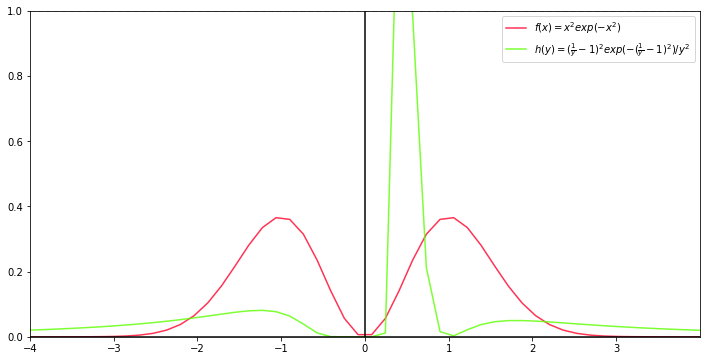

In [31]:
plot(f,x_lim=(-4,4),y_lim=(0,1),labels=labels,dist=False,ls='-')

Ahora queremos agregar la condición de finalización cuando $S < 0.01$,para lo cual nuestro pseudocódico es:


```python
def integral_X(d):
    integral = generar valor de monteCarlo 
    Scuad, n = 0, 1
    while n <= 100 or sqrt(Scuad/n) > d:
        n += 1
        X = generar 1 valor de monteCarlo
        integral_Ant = integral
        integral = integral_Ant + (X - integral_Ant) / n
        Scuad = Scuad*(1 - 1 /(n-1)) + n*(integral - integral_Ant)**2
    return integral
```

In [39]:
def montecarlo2ii():
    u = random()
    integral = 2*((((1/u-1)**2)*np.exp(-(1/u-1)**2))/u**2)
    return integral
    
def ej2ii(d):
    integral = montecarlo2ii() 
    Scuad, n = 0, 1
    while n <= 100 or np.sqrt(Scuad/n) > d:
        n += 1
        X = montecarlo2ii()
        integral_Ant = integral
        integral = integral_Ant + (X - integral_Ant) / n
        Scuad = Scuad*(1 - 1 /(n-1)) + n*(integral - integral_Ant)**2
    return integral


In [42]:
ej2ii(0.001)

0.8846889221433448

## Ej 3

Calcule mediante el metodo de Monte Carlo las siguientes integrales:
$$
\begin{split}
i)\int_{\pi}^{2\pi}\left(\cfrac{sin(x)}{x}\right)dx\\
ii)\int_{0}^{\infty}\cfrac{3}{3+x^{4}}dx
\end{split}
$$

a) Derive la expresión exacta de la desviación estándar del estimador de la integral.  
b) Obtenga mediante simulación de computadora el valor de la integral deteniendo la simulación cuando el semiancho del intervalo de confianza del $95\%$ sea justo inferior a 0.001  
c) Indique cual es el numero de simulaciones $N_{s}$ necesarias en la simulación realizada para lograr la condición pedida

### i)

#### a)
Sea $y = \cfrac{x-\pi}{2\pi-\pi} = \cfrac{x-\pi}{\pi} = \cfrac{x}{\pi}-1$  
$dy = \cfrac{1}{\pi}dx$

En primer lugar notemos que:
$$
\begin{equation*}
\begin{split}
\int_{\pi}^{2\pi}\left(\cfrac{sin(x)}{x}\right)dx = \int_{0}^{1}\left(\cfrac{sin((y+1)\pi)}{(y+1)\pi}\right)\pi dy
\end{split}
\end{equation*}
$$
Para calcular el valor de la integral con el método de MonteCarlo, lo que hacemos es estimar el valor de la integral $\theta$ como $E[g(U)]$. Sabemos que para estimar la esperanza de una v.a., un estimador insesgado es la media muestral $\bar{X}$. Queremos calcular $\sigma(\bar{X}) = \sqrt{Var(\bar{X})}$  
Calculemos entonces la varianza del estimador.


Dado que nuestro estimador es la media muestral:
$$
Var(\bar{X})= \cfrac 1n Var(X)
$$
Sea $X$ una v.a. Sabemos que:
$$
Var(X) = E[X^{2}] - E[X]^{2}
$$
Sea $\theta$ el valor real de la integral. $E[X] = \theta$. Veamos ahora $E[X^{2}]$
$$
E[X^{2}] = \int_{0}^{1}y^{2}\left(\cfrac{sin((y+1)\pi)}{((y+1)\pi)}\right)\pi dy
$$

#### b)
Para obtener el valor por simulación, debemos ademas estimar $\sigma$.

In [39]:
import math
from random import random
import numpy as np
def monteCarloEj3i():
    # Generar 1 valor de la simulación
    u = random()
    return ((np.sin((u+1)*math.pi))/((u+1)*math.pi))*math.pi

    
def Media_Muestral_M(z_alfa_2, L):#z_alfa_2 = z_(alfa/2)
    'Confianza = (1 - alfa)%, amplitud del intervalo: L'
    d = L / (2*z_alfa_2)

    Media = monteCarloEj3i()
    Scuad, n = 0, 1
    while n <= 100 or np.sqrt(Scuad / n) > d:
        n += 1
        M = monteCarloEj3i()
        Media_Ant = Media
        Media = Media_Ant + (M - Media_Ant) / n
        Scuad = Scuad*(1 - 1 /(n-1)) + n*(Media - Media_Ant)**2
    return Media,n


In [40]:
Media_Muestral_M(0.05,0.001)

(-0.43918494575897177, 437)

In [21]:
# Ahora dado un numero de simulaciones, buscamos averiguar su desvio estandar y amplitud
# de intervalo de confianza
def Media_Muestral_M_info(nSim,z_alfa_2):#z_alfa_2 = z_(alfa/2)
    'Confianza = (1 - alfa)%, amplitud del intervalo: L'
    Media = monteCarloEj3i()
    Scuad, n = 0, 1
    while n <= nSim:
        L = np.sqrt(Scuad/n)*(2*z_alfa_2)
        n += 1
        M = monteCarloEj3i()
        Media_Ant = Media
        Media = Media_Ant + (M - Media_Ant) / n
        Scuad = Scuad*(1 - 1 /(n-1)) + n*(Media - Media_Ant)**2
    return Media,L,np.sqrt(Scuad)

In [22]:
Media_Muestral_M_info(1000,0.05)

(-0.4337383343694145, 0.0006606577402881212, 0.20885261515512876)

In [26]:
Media_Muestral_M_info(5000,0.05)

(-0.4329069259305435, 0.0002969990245837815, 0.20999067785067202)

In [24]:
Media_Muestral_M_info(7000,0.05)

(-0.43619944747639744, 0.00024888876553467564, 0.20822970968015256)

## Ej 4

## Ej 5

Considere una sucesión de numeros aleatorios $\{ U_{i} \}_{i}$ y sea $M$ el primer $n$ tal que la variable $U_{n}$ es menor que la variable predecesora. Es decir

$M = n$ tal que $U_{1} \le U_{2} \le ... \le U_{n-1}$ y $U_{n} < U_{n-1}$


a) Justifique que $P(M>n) = \cfrac{1}{n!},n\ge0$

b) Utilice la identidad
$$
E[M] = \sum_{n=0}^{\infty}P(M>n)
$$
para mostrar que $E[M] = e$

c)Utilice el resultado del item anterior para estimar $e$ mediante 1000 ejecuciones de una simulación


d) Calcule el valor de la varianza muestral del estimador del item (c) y de una estimacion de $e$ mediante un intervalo de confianza del $95\%$

a) 

Tenemos que los sucesivos $U_{i}$ son v.a. independientes.
- $P (M > 1) = 1$ pues necesitamos al menos 2 variables para que tenga sentido comparar.
- $P (M > n) = 1/n!$ pues de todas las posibles permutaciones del orden en el cual pueden acomodarse nuestras n v.a. uniformes, hay una sola que nos permite asegurar que M > n; es decir, la unica forma en la cual podemos asegurar que M > n es que $U_{1}\le U_{2}\le...\le U_{n}$. La forma en la cual podemos "ordenar" sin repetir estas v.a. es exactamente n!, y la única ordenación que nos sirve es la única en la cual las variables aleatorias forman una sucesión creciente. Luego, $P(M>n) = 1/n!$ 

b) 
$$
E[M] = \sum_{n=0}^{\infty}P(M>n) = \sum_{n=0}^{\infty}\cfrac{1}{n!}
$$
Tenemos que esta es la fórmula de MacLaurin con x = 1.
$$
e^{x} = \sum_{k=0}^{n}\cfrac{f^{(k)}(0)}{k!}x^{k}+R_{k}(x)
$$


c)
Sabemos que la media muestral $\bar{X}_(n)$ es un estimador insesgado para $E[X]$.   
Luego, la simulación que podemos usar para estimar $e = E[M]$, es calcular la media muestral de la v.a. $M$. Para eso deberíamos hacer una función para generar M, y estimamos $e$ mediante 1000 ejecuciones de esa simulación. Es decir, estimamos $e$ estimando la media muestral de una muestra de 1000 valores de M.


```python
def generarM():
    M = 0
    u_i = random()
    u_ii = random()
    while u_i <= u_ii:
        M+=1
        u_i = u_ii
        u_ii = random()
    return M

def estimar_e():
    e = generarM()
    for _ in range(1000):
        n += 1
        M = generarM()
        e_Ant = e
        e = e_Ant + (M - e_ant) / n
    return e
        
```

In [63]:
def generarM():
    u_i = random()
    u_ii = random()
    M = 2
    while u_i > u_ii:
        M+=1
        u_i = u_ii
        u_ii = random()
    return M

def estimar_e():
    e = generarM()
    for i in range(1,1000):
        M = generarM()
        e_Ant = e
        e = e_Ant + (M - e_Ant) / (i)
    return e

estimar_e()

2.7247247247247284

d) Como utilizamos $\bar{X}(n) = \hat{e}$ para estimar $E[M] = e$, el cual es un estimador insesgado, tenemos que
$Var(\hat{e}) = ECM(\hat{e},E[M] = e)$

$$
\begin{equation*}
\begin{split}
Var(\hat{e}) = Var(\bar{X}(n)) = Var(\cfrac{X_{1}+...+X_{n}}{n}) = \frac{1}{n^{2}} Var(X_{1}+...+X_{n})
\end{split}
\end{equation*}
$$
Como $X_{1},...,X_{n}$ son independientes, tenemos que:
$$
\begin{equation*}
\begin{split}
Var(\bar{X}(n)) &= \frac{1}{n^{2}}[Var(X_{1})+...+Var(X_{n})]\\
&= \cfrac{n}{n^{2}} Var(X) = \cfrac 1n Var(X)
\end{split}
\end{equation*}
$$
Calculemos entonces $Var(X)$ que en nuestro caso particular es $Var(M)$

Tenemos que dada una v.a. $X$, 
$$
Var(X) = E[X^{2}] - E[X]^{2}
$$
Tenemos además que:
$$
E[M] = \sum_{n=0}^{\infty}n P(n=M) = \sum_{n=0}^{\infty}P(M>n) = \sum_{n=0}^{\infty}\cfrac{1}{n!} 
$$
Asumiendo que $P(M>n) = \cfrac{1}{n!}$
$$
\begin{equation*}
\begin{split}
P(M=n) = P(M \le n) - P(M \le (n-1)) &= (1 - \cfrac{1}{n!})-(1-\cfrac{1}{(n-1)!})\\
&= \cfrac{1}{(n-1)!} - \cfrac{1}{n!}
\end{split}
\end{equation*}
$$
Ahora bien, $Var(M) = E[M^{2}] - E[M]^{2} = E[M^{2}] - e^{2}$, luego sólo nos queda ver $E[M^{2}]$
$$
\begin{equation*}
\begin{split}
E[M^{2}] &= \sum_{n=0}^{\infty}n^{2} [\cfrac{1}{(n-1)!} - \cfrac{1}{n!}] \\
&= \sum_{n=0}^{\infty}\cfrac{n^{2}}{(n-1)!} - \sum_{n=0}^{\infty}\cfrac{n}{(n-1)!} \\
&= 5e - 2e = 3e
\end{split}
\end{equation*}
$$
Luego, tenemos que
$$
Var(M) = (3e) - e^{2} = e(3-e)
$$


Concluyendo:
$$
Var(\hat{e}) = \cfrac 1n Var(M) = \cfrac{e(3-e)}{n} 
$$


```python
def Media_Muestral_M(z_alfa_2, L):#z_alfa_2 = z_(alfa/2)
    'Confianza = (1 - alfa)%, amplitud del intervalo: L'
    d = L / (2*z_alfa_2)
    Media = generar M 
    Scuad, n = 0, 1
    while n <= 100 or sqrt(Scuad / n) > d:
        n += 1
        simular M
        Media_Ant = Media
        Media = MediaAnt + (M - MediaAnt) / n
        Scuad = Scuad*(1 - 1 /(n-1)) + n*(Media - Media_Ant)**2
    return Media
```

## Ej 6

Estime $\pi$ sorteando puntos uniformemente distribuidos en el cuadrado cuyos vértices son: (1,1),(−1,1),(−1,−1),(1,−1), y contabilizando la fracción que cae dentro del círculo inscrito de radio 1. Obtenga un intervalo de ancho menor que 0.1, el cual contenga a $\pi$ con el 95% de confianza.  
¿Cuántas ejecuciones son necesarias?

In [20]:
from random import random
import numpy as np

def estimador_pi(z_alfa_2,L):
    'Confianza: 100(1-alpha)%'
    'L: amplitud del intervalo'
    d = L / (2*z_alfa_2)
    p = valorPi()
    n = 1
    while n <= 100 or np.sqrt(p*(1 - p) / n) > d:
        n += 1
        X = valorPi()
        p = p + (X - p) / n
    return 4*p,n

def valorPi():
    enCirculo = 0
    u = 2*random() - 1
    v = 2*random() - 1
    if u**2 + v**2 <= 1:
        enCirculo = 1
    return enCirculo

estimador_pi(0.05,0.1)

(3.207920792079208, 101)

## Ej 7

Sean $X_{1},...,X_{n}$ variables aleatorias independientes e idénticamente distribuidas con media $\mu$ desconocida. Para a y b constantes dadas,$a<b$, nos interesa estimar
$$
p=P(a<\bar{X} -\mu<b)
$$
sabiendo que $\bar{X} = \sum_{i=1}^{n}X_{i}/n$

a) Explique como usar el metodo bootstrap para estimar $p$  
b) Estime $p$ asumiendo que para $n=10$, los valores de las variables $X_{i}$ resultan 56, 101, 78, 67, 93, 87,64, 72, 80 y 69 y $a=−5 , b=5$.

### a)
Vamos a estimar $p$ como una proporcion:
$$
p \approx P(a<\bar{X}-\mu_{F_{e}}[X]<b) = \cfrac {\# \left \{ (x_{i1},x_{i2},...,x_{in}) | a < \bar{X} (x_{i1},x_{i2},...,x_{in}) - \mu_{F_{e}} < b\right \}}{n^{n}} 
$$
donde $(x_{i1},x_{i2},...,x_{in})$ son las diferentes muestras bootstrap y $n^{n}$ es el total de muestras bootstrap.  
Si $n^{n}$ es muy grande, vamos a estimar usando MonteCarlo

In [33]:
from random import random
import numpy as np

def muestra_bootstrap(muestra):
    return [muestra[int(random()*len(muestra))] for _ in muestra]

In [35]:
muestra = [56, 101, 78, 67, 93, 87,64, 72, 80, 69]

In [36]:
def estimar_p(muestra,a,b,B):
    mean_fe = np.mean(muestra)
    t = 0
    for _ in range(B):
        mean_y = np.mean(muestra_bootstrap(muestra))
        z = mean_y - mean_fe
        if a < z and z < b:
            t +=1
    return t / B

In [37]:
estimar_p(muestra,-5,5,10000)

0.7726

## Ejercicio 8

Sean $X_{1},..,X_{n}$ variables aleatorias independientes e identicamente distribuidas con varianza $\sigma^{2}$ desconocida. Se planea estimar $\sigma_{2}$ mediante la varianza muestral
$$ S^{2} = \sum_{i=1}^{n}(X_{i}-\bar{X})^{2}/(n-1)$$
Si $n=2,X_{1}=1,X_{2}=3$, cual es la estimación bootstrap de $Var(S^{2})$?


In [49]:
def ej8():
    muestras_bootstrap = [[1,1],[1,3],[3,1],[3,3]]
    muestra = [1,3]
    theta_b = []
    var_theta = np.var([np.var(b) for b in muestras_bootstrap])
    return var_theta

In [51]:
ej8()

0.25

## Ejercicio 9

Sean $X_{1},...,X_{n}$ variables aleatorias normales, independientes e idénticamente distribuidas con media $\mu$ y varianza $\sigma^{2}$ desconocidas. Considere el estimador $T$ dado por:
$$T = \cfrac{\hat{X}-\mu}{S / \sqrt{n}}$$
Donde $S$ es la desviacion estandar muestral y $\bar{X}$ es la media muestral.


a) Dada una muestra en particular, explique detalladamente cómo puede utilizarse el método “bootstrap” para estimar la probabilidad $p=P(T>a)$, donde $a$ es un número real conocido.  
i)¿Qué valor de $\mu$ se emplea en la implementación de este método?  
ii)¿Cuántas muestras “bootstrap” distintas pueden generarse a partir de una dada muestra empíricade tamaño n?  


b)La siguiente muestra de 10 valores fue obtenida mediante un generador de variables aleatorias normales:
$$3.0592,2.3304,2.8548,1.2546,2.1628,4.9828,5.4259,0.9078,4.5811,3.2749$$
Calcule los valores muestrales de ̄$\bar{X}$ y $S^{2}$


c)Dado $a=2.50$, estimar $p$ con 100 000 simulaciones a partir de la muestra dada, utilizando el método de “bootstrap”. Escriba el resultado con 5 decimales.

### a)

Para estimar $p$ con muestras bootstrap lo que vamos a hacer es muy similar al ejercicio anterior.
1. Calculamos $\mu = \mu_{F_{e}}$ como la media de la muestra original
2. Si $n^{n}$ no es muy grande, generamos las $n^{n}$ muestras bootstrap, si no, generamos $B << n^{n}$ muestras bootstrap
3. Estimamos T para cada muestra boostrap b, donde $\bar{X}$ es la media muestral de b, $\mu$ es la media muestral original, y $S$ es la desviacion estandar bootstrap
4. Contamos en cuantas de esas estimaciones $T > a$ y nuestra estimacion de sera $p = T/B$ o $p = T/n^{n}$

### b)

In [53]:
muestra = [3.0592,2.3304,2.8548,1.2546,2.1628,4.9828,5.4259,0.9078,4.5811,3.2749]
np.mean(muestra)

3.0834299999999994

In [54]:
np.var(muestra)

2.091990590100001

### c)

In [58]:
a = 2.5
def ej9c(muestra,a,nSim):
    p = 0
    mu_e = np.mean(muestra)
    n = len(muestra)
    for _ in range(nSim):
        b = muestra_bootstrap(muestra)
        mu_b = np.mean(b)
        std_b = np.std(b)
        T = (mu_b-mu_e)/(std_b/np.sqrt(n))
        if T > a:
            p +=1
    return p/nSim
        

In [59]:
ej9c(muestra,2.5,100000)

0.01719

## Ej 10

Fundamentos teóricos hacen pensar que existe un nuevo tipo de estrella variable explosiva,cuya curva de luz decae en 9 dias.  Dada la dificultad de observar este tipo de fenómenos, solo se conocen10 candidatos. Las duraciones de las explosiones en los mismos son las siguientes (en dias):
$$7.5,12.3,8.8,7.9,9.3,10.4,10.9,9.6,9.1,11.2$$
(a)  Asumiendo  que  las  explosiones  observadas  corresponden  a  un  mismo  fenómeno,  calcule  el  valor esperado empírico de su duración.  
(b)  Obtenga la aproximación bootstrap del error cuadrático medio$ECM(\bar{X},\mu)$.  
(c)  Determine, usando la técnica de bootstrap, la probabilidad de que la media muestral ̄$\bar{X}$ se encuentre en el rango 8 a 10.

### a)
Para calcular el valor esperado empirico de la duración, usamos como estimador la media muestral de la muestra.

In [75]:
muestra = [7.5,12.3,8.8,7.9,9.3,10.4,10.9,9.6,9.1,11.2]
np.mean(muestra)

9.7

### b)
Queremos obtener la aproximacion bootstrap del $ECM(\bar{X},\mu)$, es decir, el error cuadratico medio del estimador $\bar{X}$ respecto del valor esperado real. Como el valor esperado real es desconocido, vamos a estimar el error cuadratico medio por 
$$
ECM(\bar{X},\mu) \sim \cfrac{1}{N} \sum_{i=1}^{N}\left ( \bar{X}(x_{i1},..,x_{in}) - \mu_{F_{e}} \right )^{2}
$$
Donde $(x_{i1},..,x_{in})$ son las $N$ muestras bootstrap generadas.

In [82]:
def ej10b(muestra,B):
    mu_e = np.mean(muestra)
    ecm = 0
    for _ in range(B):
        b = muestra_bootstrap(muestra)
        mu_b = np.mean(b)
        ecm += (mu_b - mu_e)**2
    return ecm/B

ej10b(muestra,10000)

0.20281705000000042

### c)
Queremos determinar la probabilidad de que $8 < \bar{X} < 10$ para lo cual vamos a generar muestras bootstrap, calcular su media, y devolver la proporcion de estas en cuya media está entre 8 y 10

In [83]:
def ej10c(muestra,a,b,B):
    p = 0
    for _ in range(B):
        mu_b = np.mean(muestra_bootstrap(muestra))
        if a < mu_b and mu_b < b:
            p += 1
    return p/B

ej10c(muestra,8,10,10000)

0.7396